# Loan Approval Classification Dataset

## **Dataset Description**
The Loan Approval Classification Dataset contains information about loan applicants, including their demographic, financial, and credit-related details. The primary goal is to predict whether a loan application will be approved or rejected.

---

## **Columns and Descriptions**

| **Column Name**                  | **Description**                                               | **Type**         |
|----------------------------------|---------------------------------------------------------------|------------------|
| `person_age`                     | Age of the applicant                                          | Float           |
| `person_gender`                  | Gender of the applicant                                       | Categorical      |
| `person_education`               | Highest level of education attained                          | Categorical      |
| `person_income`                  | Annual income of the applicant (in currency units)           | Float           |
| `person_emp_exp`                 | Years of employment experience                               | Integer          |
| `person_home_ownership`          | Home ownership status (e.g., rent, own, mortgage)            | Categorical      |
| `loan_amnt`                      | Loan amount requested                                         | Float           |
| `loan_intent`                    | Purpose of the loan                                           | Categorical      |
| `loan_int_rate`                  | Interest rate of the loan                                    | Float           |
| `loan_percent_income`            | Loan amount as a percentage of annual income                 | Float           |
| `cb_person_cred_hist_length`     | Length of credit history in years                            | Float           |
| `credit_score`                   | Credit score of the applicant                                | Integer          |
| `previous_loan_defaults_on_file` | Indicator of any previous loan defaults (Yes/No)             | Categorical      |
| `loan_status`                    | Loan approval status (1 = Approved, 0 = Rejected) (Target)   | Integer          |

---

## **Key Points**
- **Target Variable**: `loan_status` (binary classification: 1 = approved, 0 = rejected)
- **Feature Types**:
- **Applications**:
  - Predicting loan approvals for financial institutions.
  - Understanding the key factors influencing loan approval decisions.

---

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from scipy import stats
from IPython.display import display
from feature_engine.outliers import OutlierTrimmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")



# Reading the Dataset

In [2]:
df = pd.read_csv("data.csv")


# Data Preprocessing

## Getting insights and information about the dataset

In [3]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

### Changing the data type of the age from float64 to int 

In [6]:
df['person_age'] = df['person_age'].astype('int')

In [7]:
print(df.isnull().sum())
df = df.dropna()


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [8]:
df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

### Loan status is inbalanced, so we are going to choose f1-score as one of our main evaluation metric

In [9]:
df["loan_status"].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

# Seperate Numerical Columns and Cetegorical columns

In [10]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.pop()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


### Plots a Seaborn histogram for a given categorical column in the dataset.
    
    Parameters:
    - column (str): The name of the categorical column.
    - df (pd.DataFrame): The DataFrame containing the data.


In [12]:
def plot_categorical_histogram(column, df):
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Ensure everything fits
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add a grid for readability
    plt.show()

Plotting for: person_gender


/tmp/ipykernel_24427/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


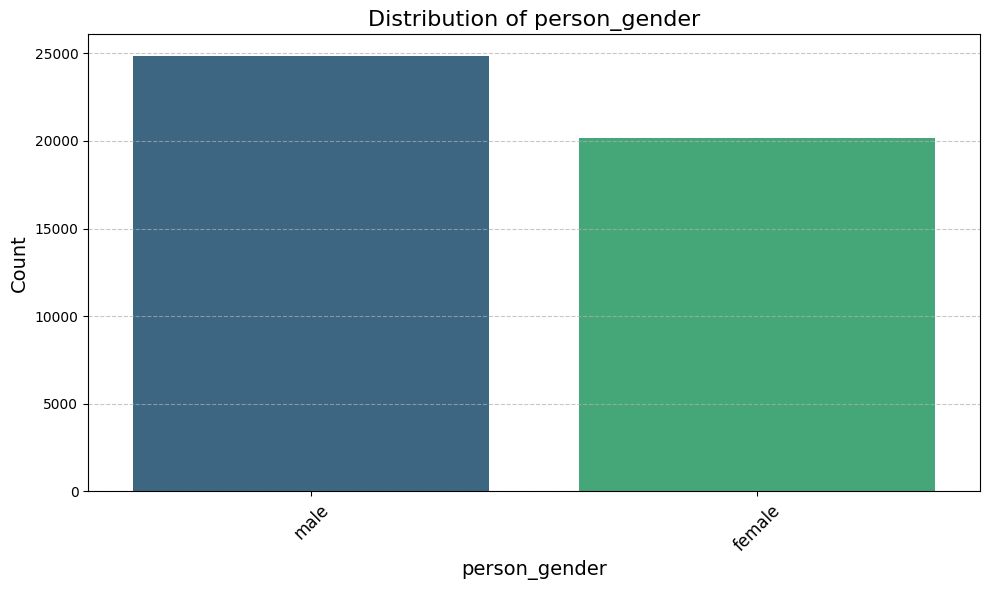

'---------------'

Plotting for: person_education


/tmp/ipykernel_24427/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


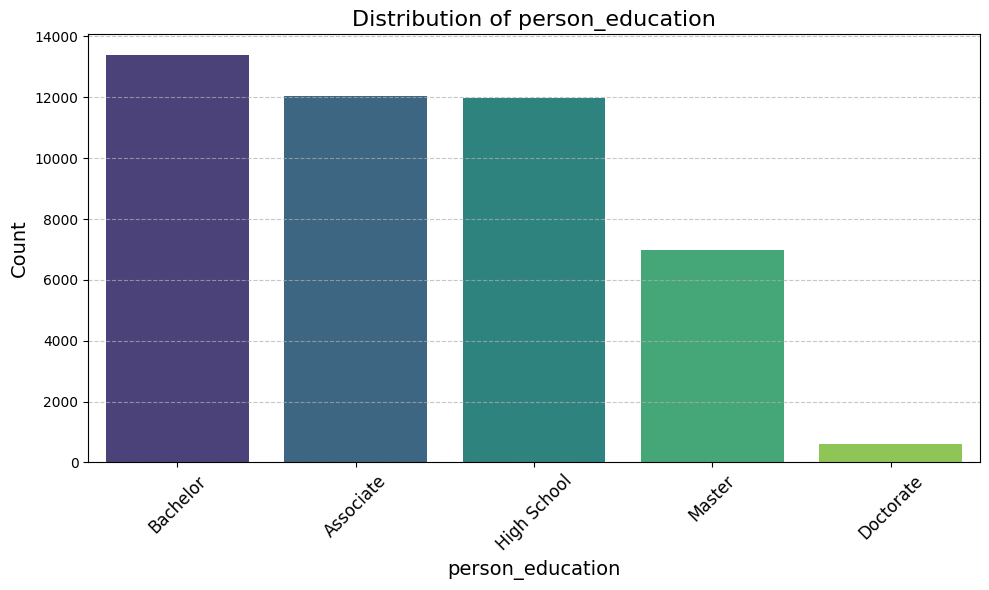

'---------------'

Plotting for: person_home_ownership


/tmp/ipykernel_24427/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


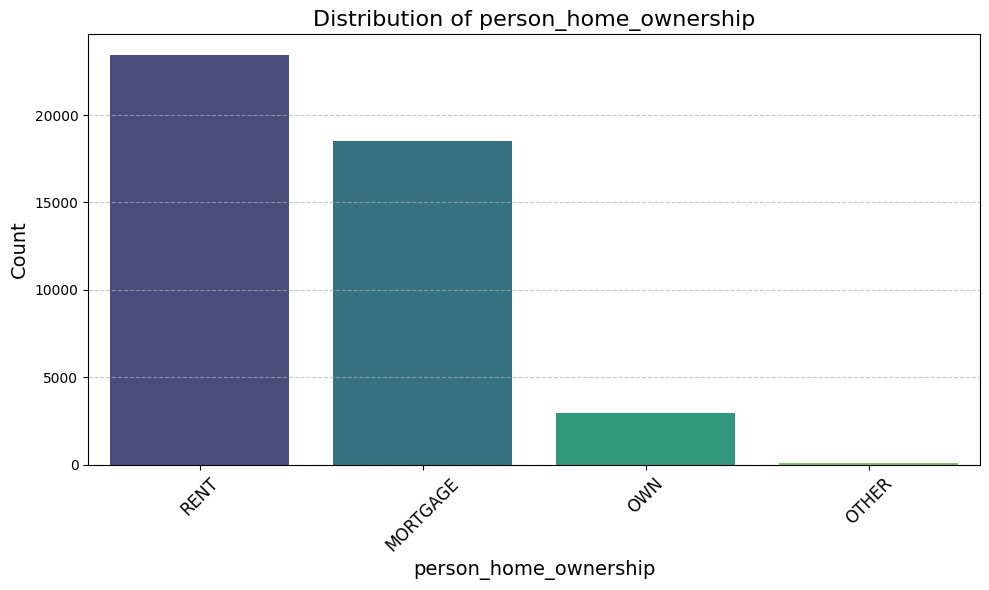

'---------------'

Plotting for: loan_intent


/tmp/ipykernel_24427/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


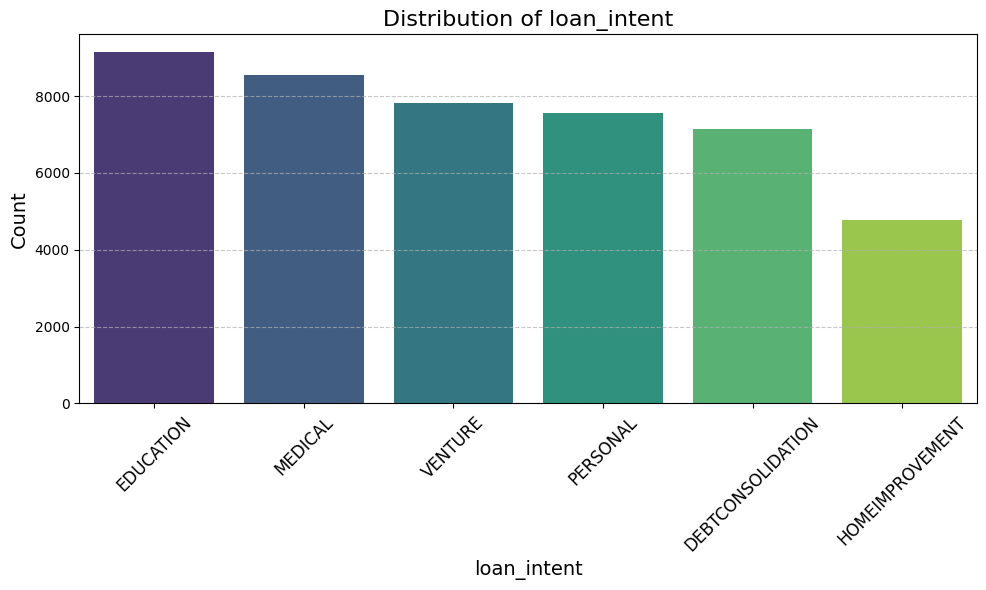

'---------------'

Plotting for: previous_loan_defaults_on_file


/tmp/ipykernel_24427/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


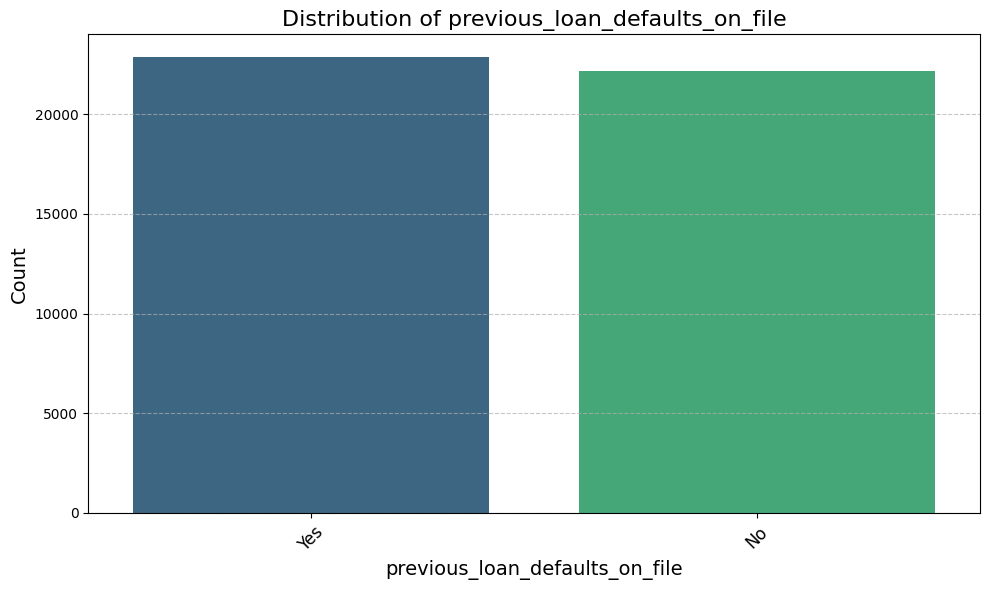

'---------------'

In [13]:
for column in categorical_columns:
    print(f"Plotting for: {column}")
    plot_categorical_histogram(column, df)
    display("---------------")  # Ensures separation between cells

### Checking the ratios of approved to disapproved loans 

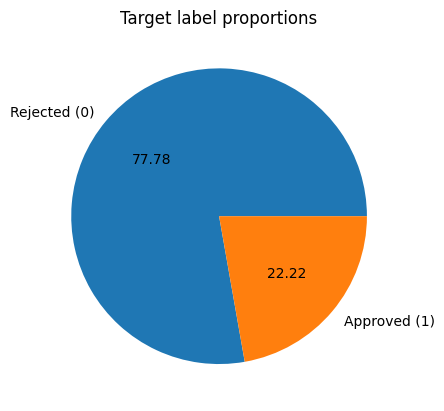

In [15]:
label_prop = df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

### plotting a boxplot and histplot for all of the numerical columns

    - The Data is mostly skewed and there are too many outliers to handle

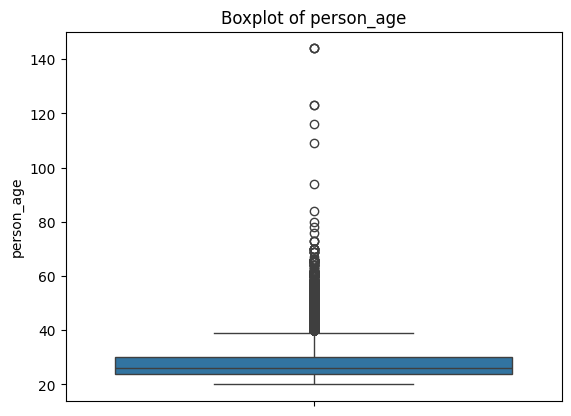

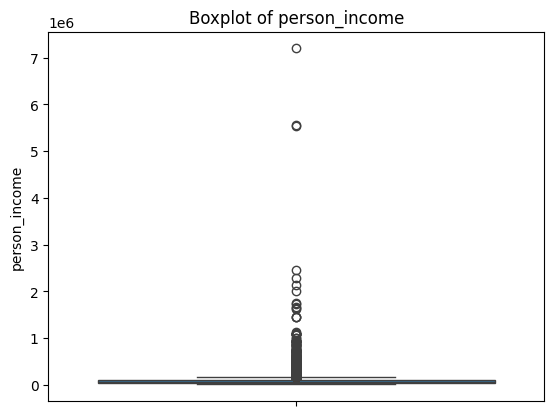

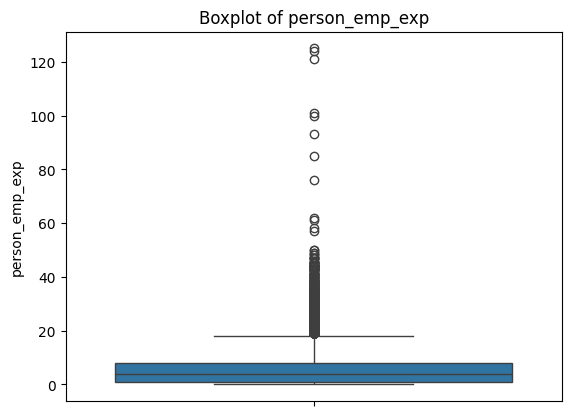

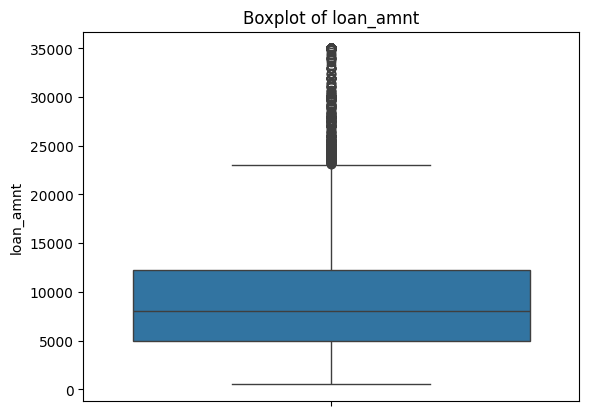

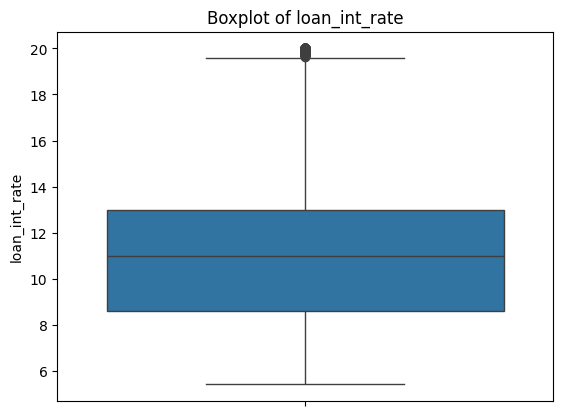

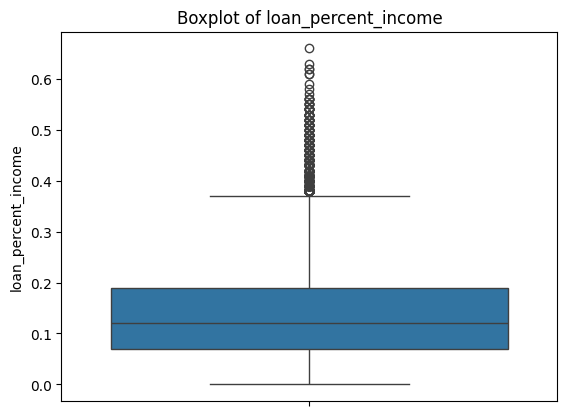

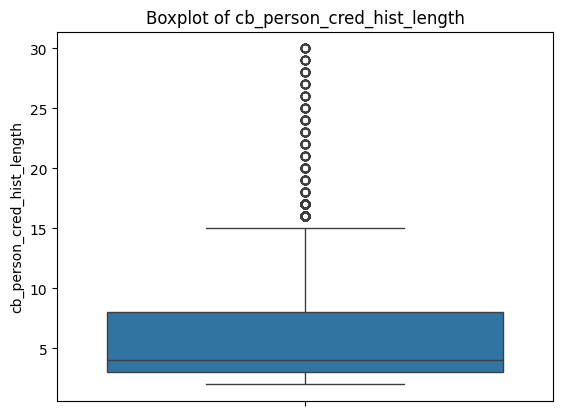

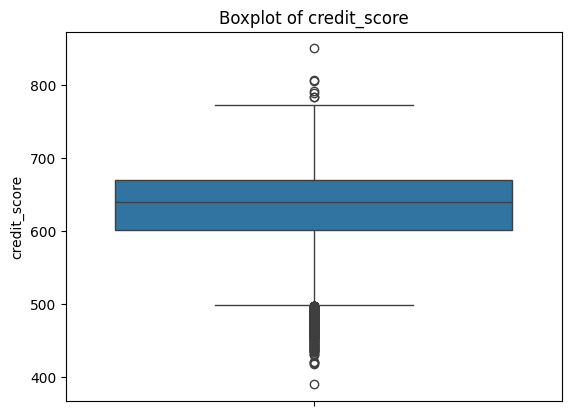

In [14]:
for col in numerical_columns:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### The histograms show skewed distribution and only the credit score is the normally distribuited feature (nearly)

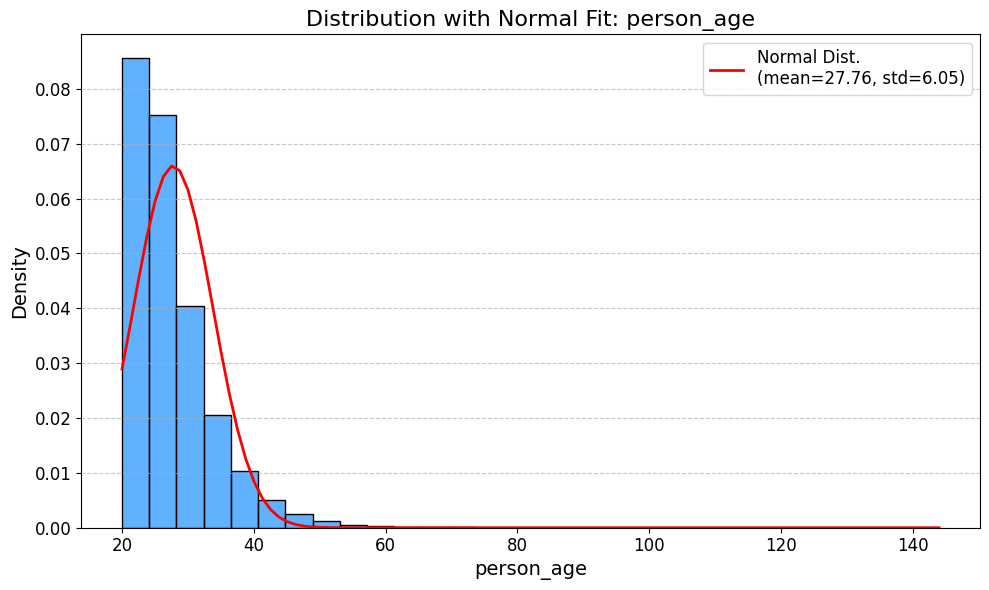

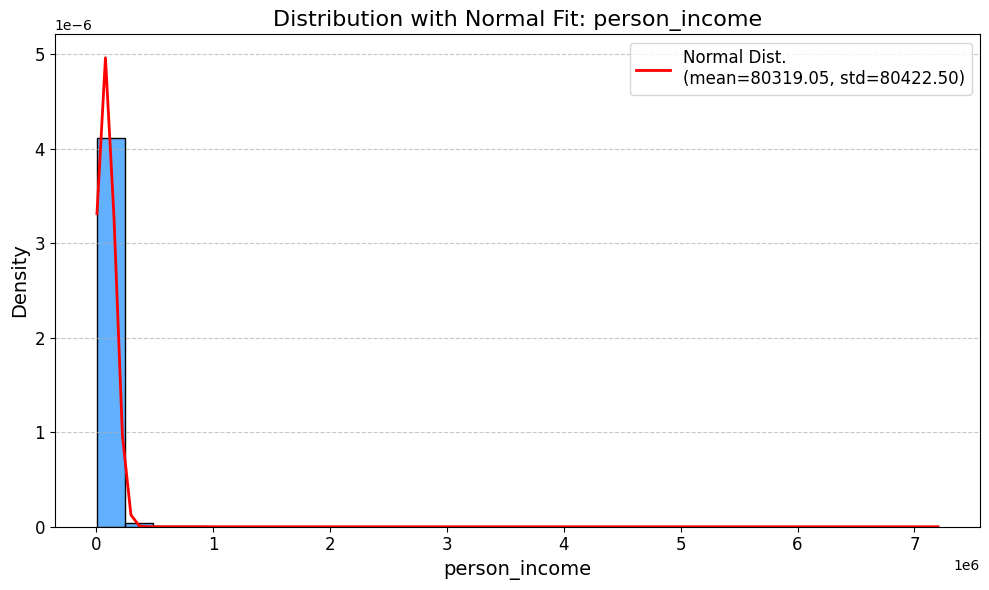

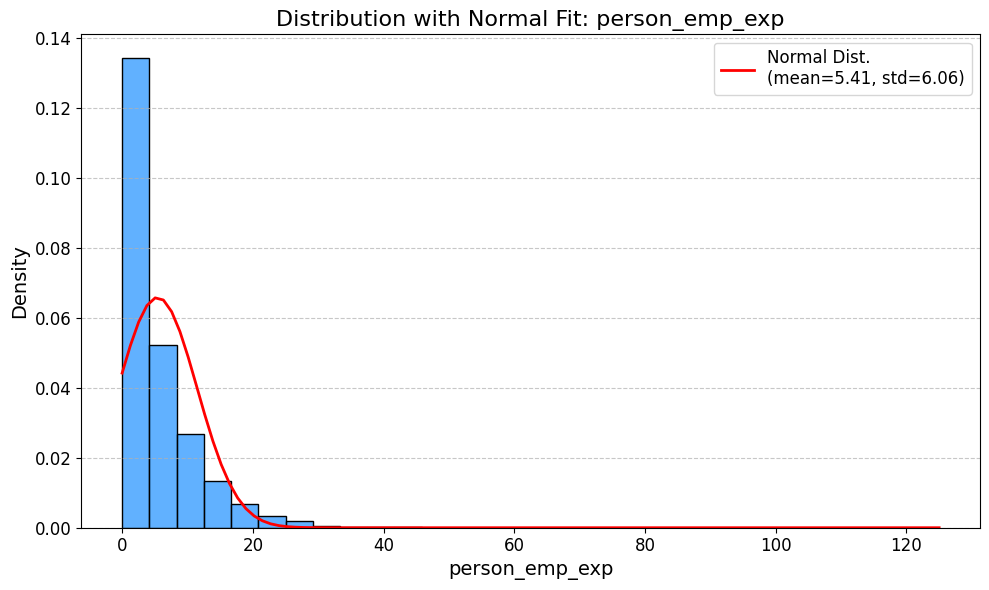

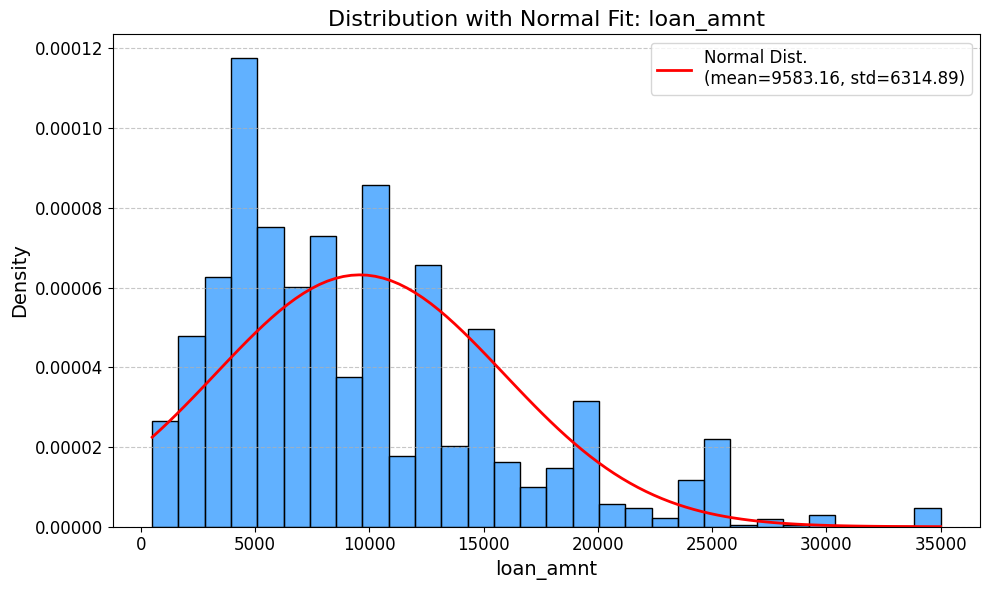

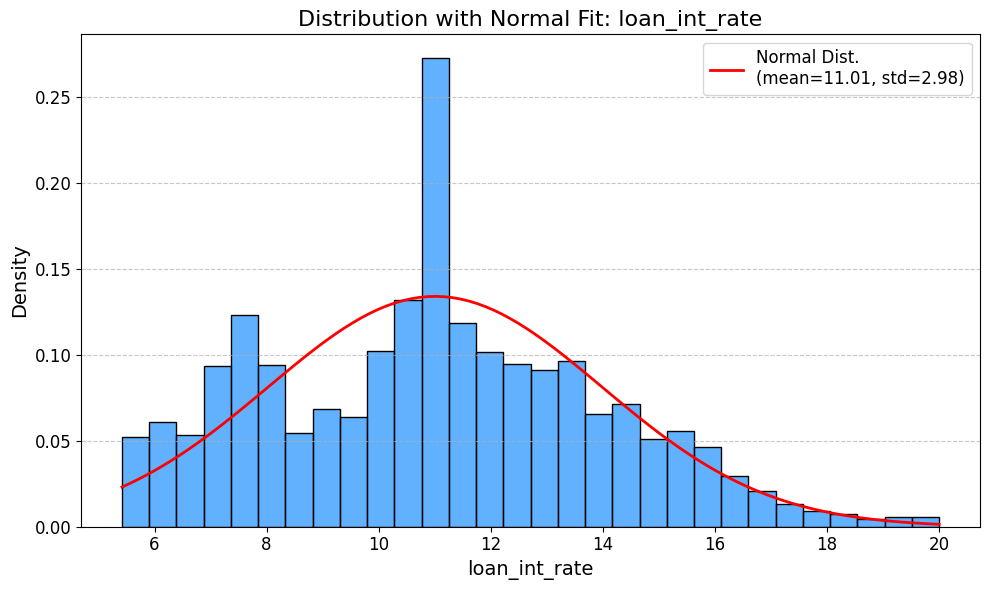

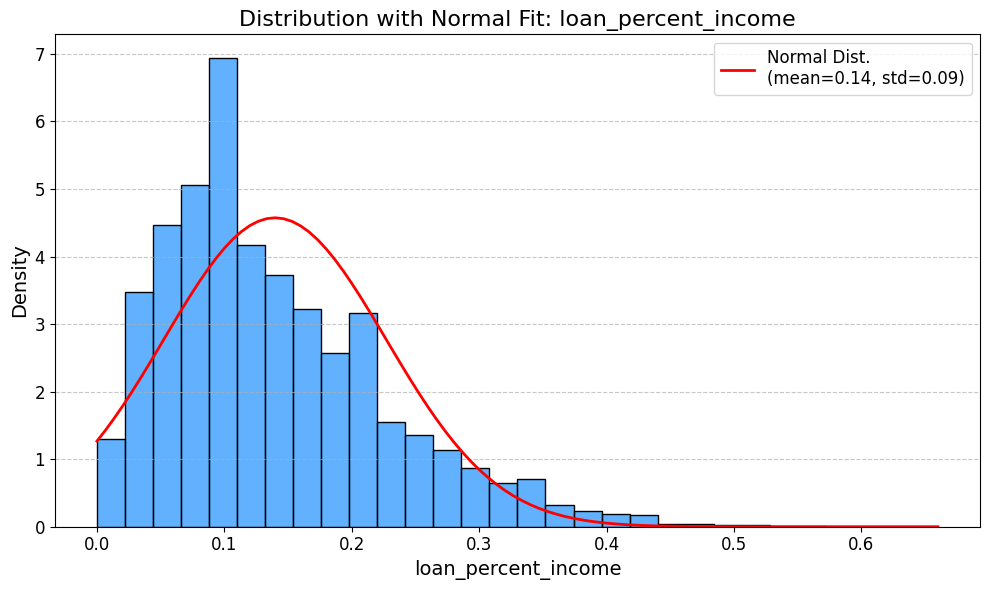

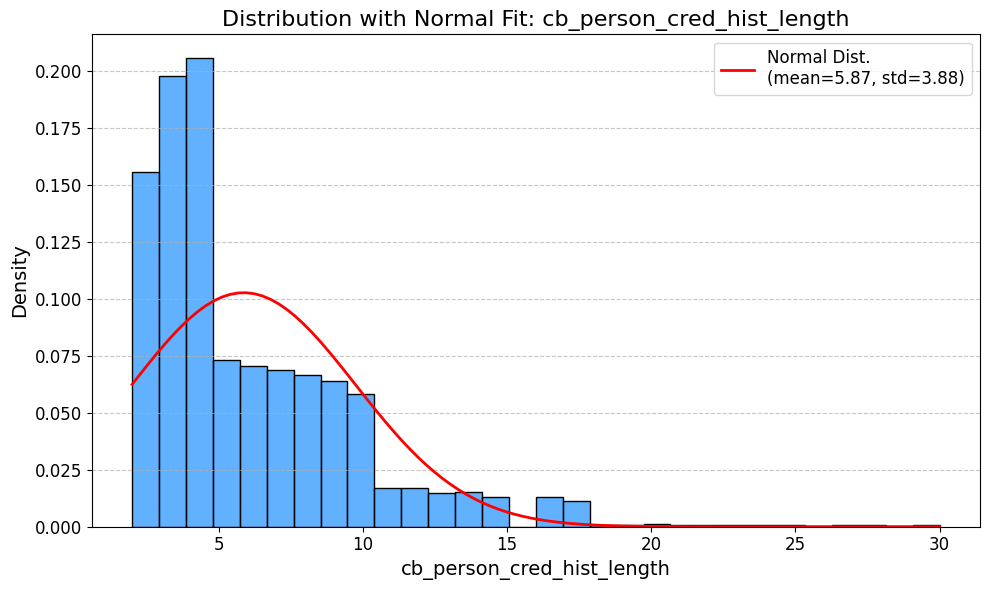

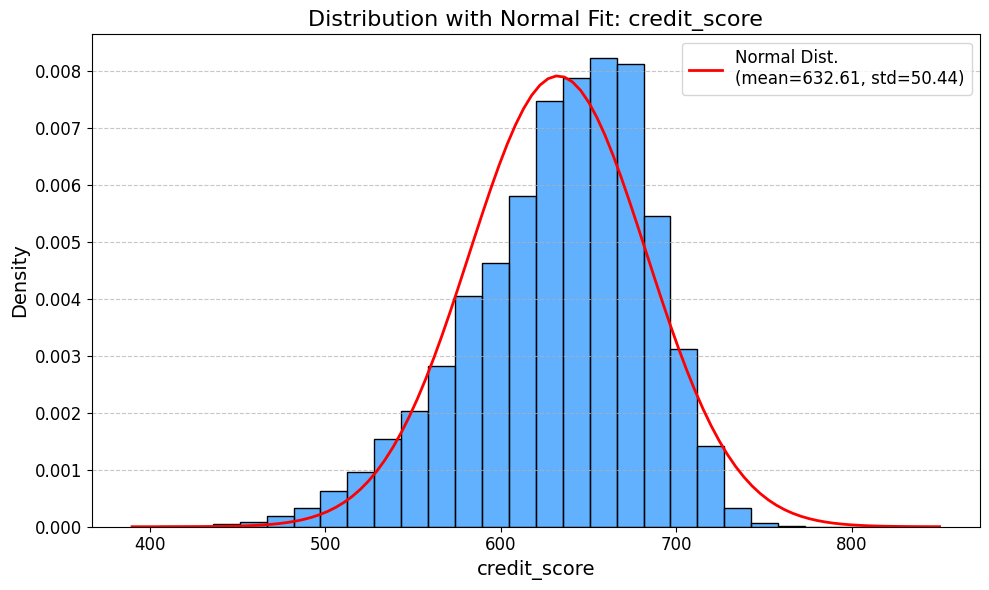

In [17]:

for col in numerical_columns:
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plot the histogram of the column
    sns.histplot(data=df, x=col, kde=False, color="dodgerblue", bins=30, edgecolor="black", alpha=0.7, stat='density')

    # Fit a normal distribution to the data
    mean, std = df[col].mean(), df[col].std()  # Calculate mean and standard deviation
    x = np.linspace(df[col].min(), df[col].max(), 100)  # Generate x-values for the normal curve
    y = norm.pdf(x, mean, std)  # Generate the normal PDF values

    # Plot the normal distribution curve
    plt.plot(x, y, color="red", linewidth=2, label=f"Normal Dist.\n(mean={mean:.2f}, std={std:.2f})")

    # Add titles and labels
    plt.title(f'Distribution with Normal Fit: {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)  # Add a legend for the normal curve
    plt.tight_layout()  # Ensure everything fits well
    plt.show()


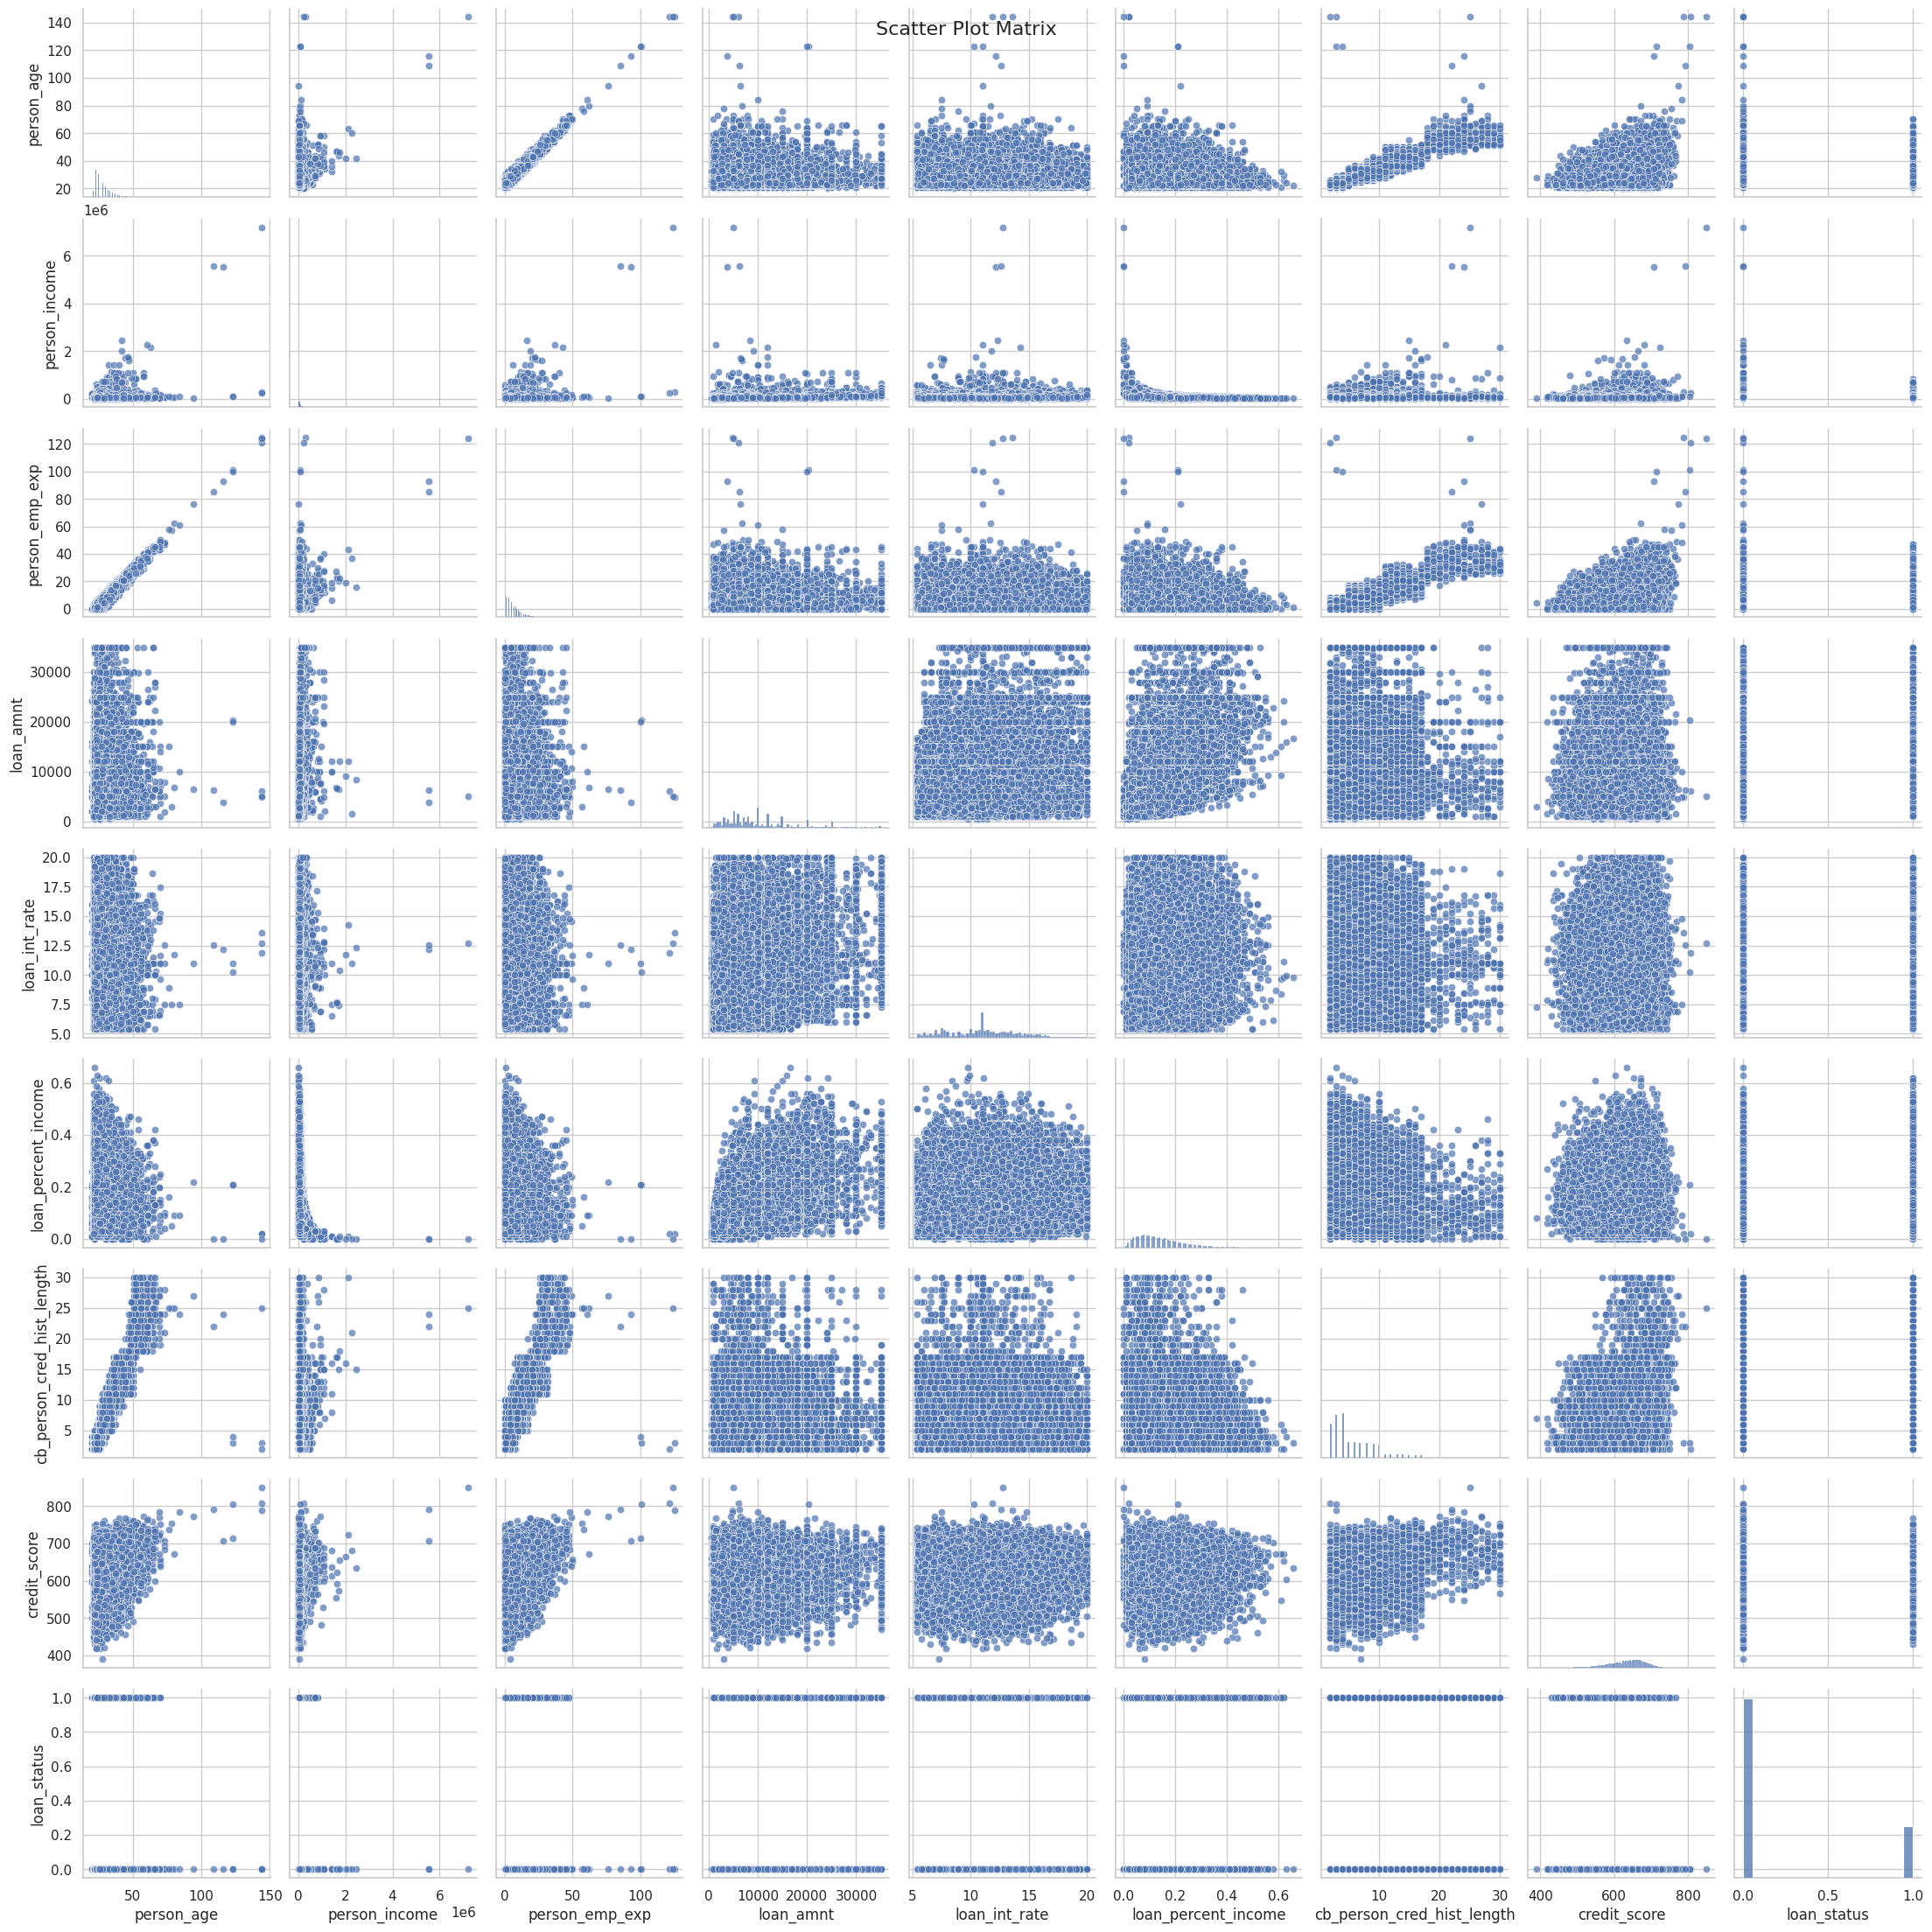

In [18]:
sns.set(style="whitegrid")

sns.pairplot(df, kind="scatter", plot_kws={'alpha': 0.7})

plt.suptitle("Scatter Plot Matrix", size=16)
plt.show()

### Correlation matrix
    -- Strong corrleation between person_income and person_age (0.95)
    -- Strong cb_person_cred_hist_length and person_age (0.86)
    -- Mid correlation between loan_percent_income and loan_amount (0.59)
    -- Interesting correlation between loan_status and loan_percent_amount (0.38)
    -- Interesting corrleation betweeen loan_int_rate and loan_status (0.33)

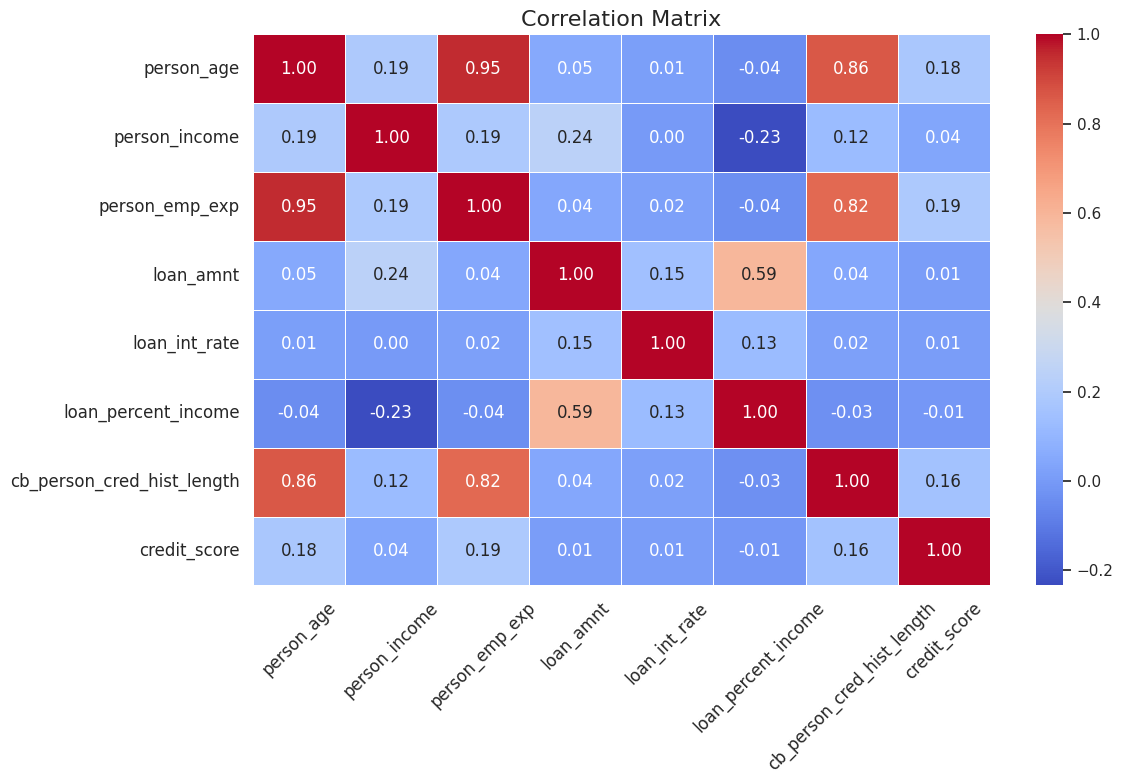

In [19]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

# Data Cleaning

### Handle categorical variables with label encoding

In [15]:
gender_mapping = {'male': 0, 'female': 1}
home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
loan_intent_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
previous_loan_defaults_mapping = {'No': 0, 'Yes': 1}
person_education_mapping = { 'High School': 0,'Associate': 1,'Bachelor': 2,'Master': 3,'Doctorate':4}


df['person_gender'] = df['person_gender'].map(gender_mapping)
df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_mapping)
df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(previous_loan_defaults_mapping)
df["person_education"] = df["person_education"].map(person_education_mapping)


### Trim the outliers using IQR 

In [16]:

def iqr_outlier_trimmer(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        if column == "loan_status":
            continue
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

df = iqr_outlier_trimmer(df)
df.head()


person_age  person_gender  person_education  person_income  \
1           21              1                 0        12282.0   
5           21              1                 0        12951.0   
9           21              1                 0        12739.0   
19          24              1                 3        14283.0   
23          24              1                 2        13866.0   

    person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
1                0                      1     1000.0            1   
5                0                      1     2500.0            3   
9                0                      1     1600.0            3   
19               1                      2     1750.0            1   
23               0                      1     1500.0            0   

    loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
1           11.14                 0.08                         2.0   
5            7.14                 0.19                         2.0   
9           14.74                 0.13                         3.0   
19          10.99                 0.12                         2.0   
23           7.29                 0.11                         3.0   

    credit_score  previous_loan_defaults_on_file  loan_status  
1            504                               1            0  
5            532                               0            1  
9            640                               0            1  
19           679                               0            1  
23           600                               1            0

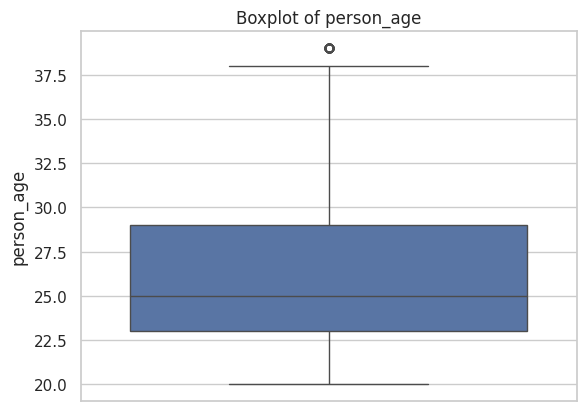

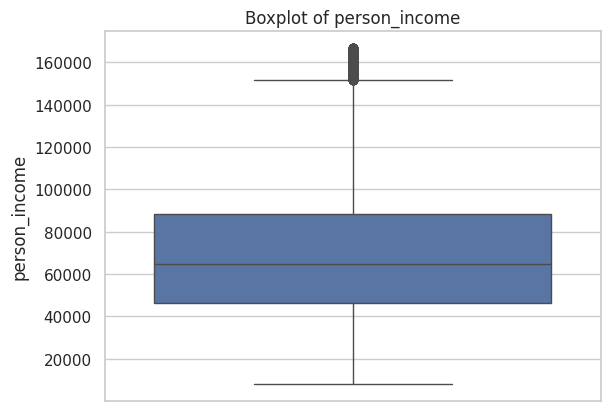

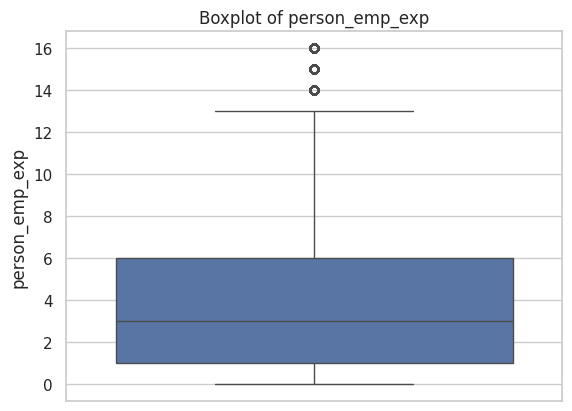

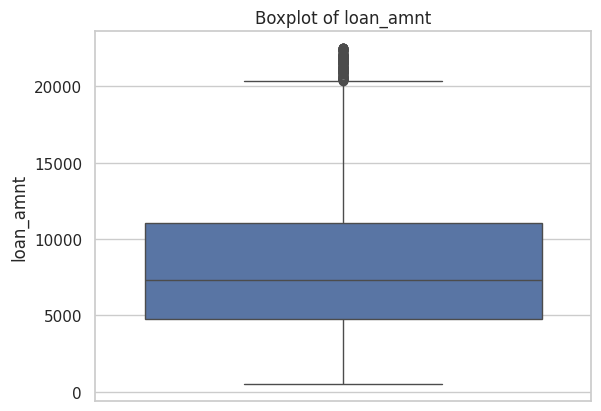

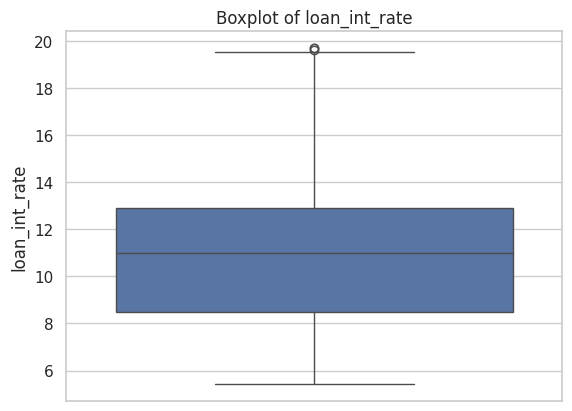

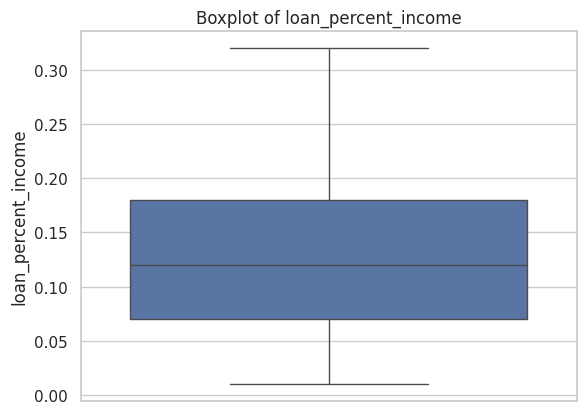

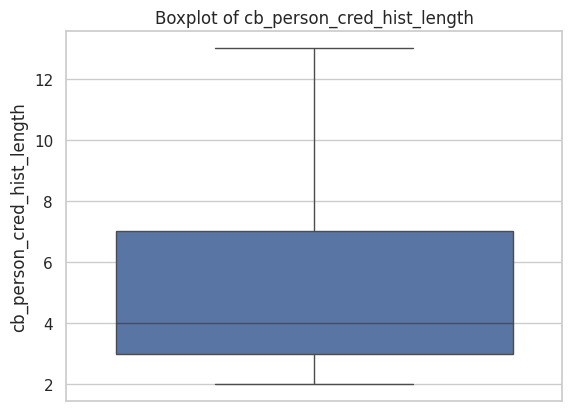

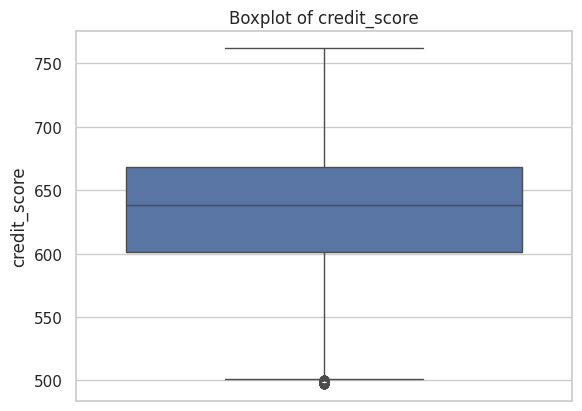

In [22]:
for col in numerical_columns:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Standardize the datasets using min_max  scaler

In [23]:

df.head()

person_age  person_gender  person_education  person_income  \
1           21              1                 0        12282.0   
5           21              1                 0        12951.0   
9           21              1                 0        12739.0   
19          24              1                 3        14283.0   
23          24              1                 2        13866.0   

    person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
1                0                      1     1000.0            1   
5                0                      1     2500.0            3   
9                0                      1     1600.0            3   
19               1                      2     1750.0            1   
23               0                      1     1500.0            0   

    loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
1           11.14                 0.08                         2.0   
5            7.14                 0.19                         2.0   
9           14.74                 0.13                         3.0   
19          10.99                 0.12                         2.0   
23           7.29                 0.11                         3.0   

    credit_score  previous_loan_defaults_on_file  loan_status  
1            504                               1            0  
5            532                               0            1  
9            640                               0            1  
19           679                               0            1  
23           600                               1            0

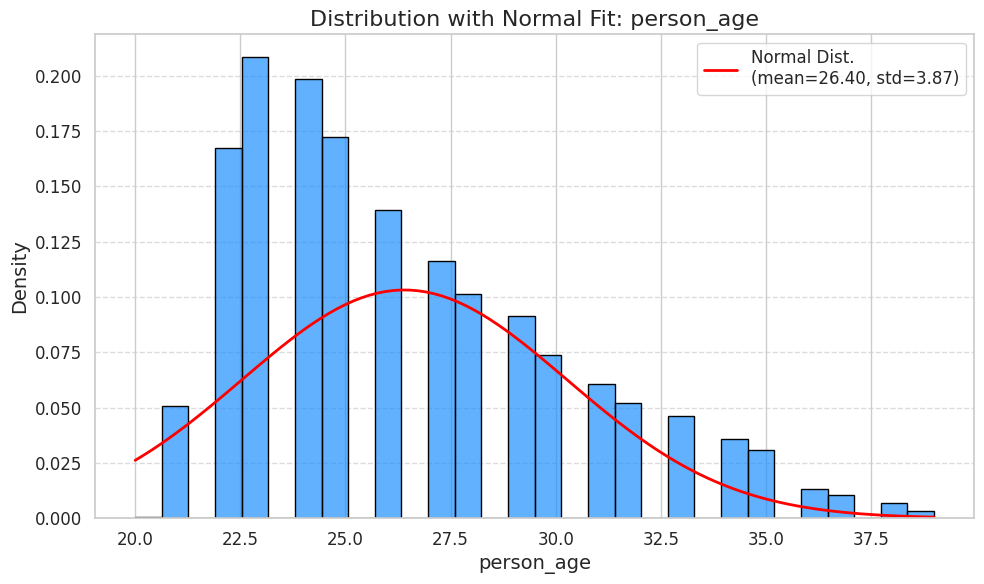

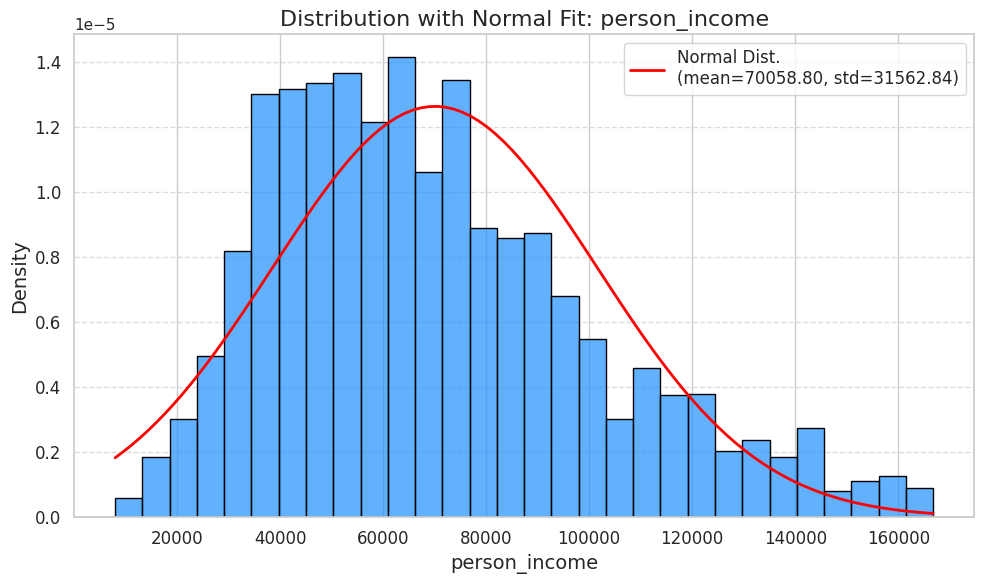

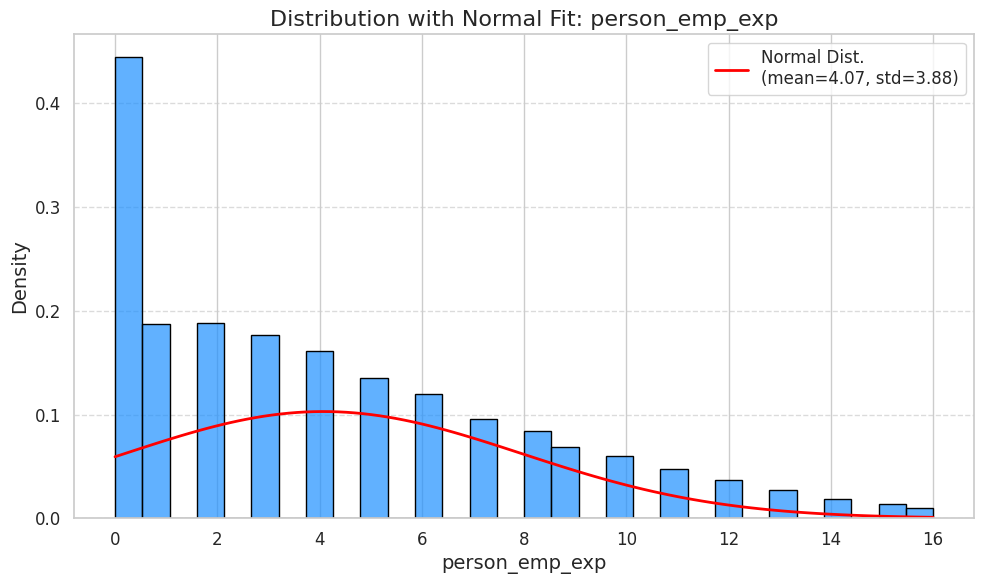

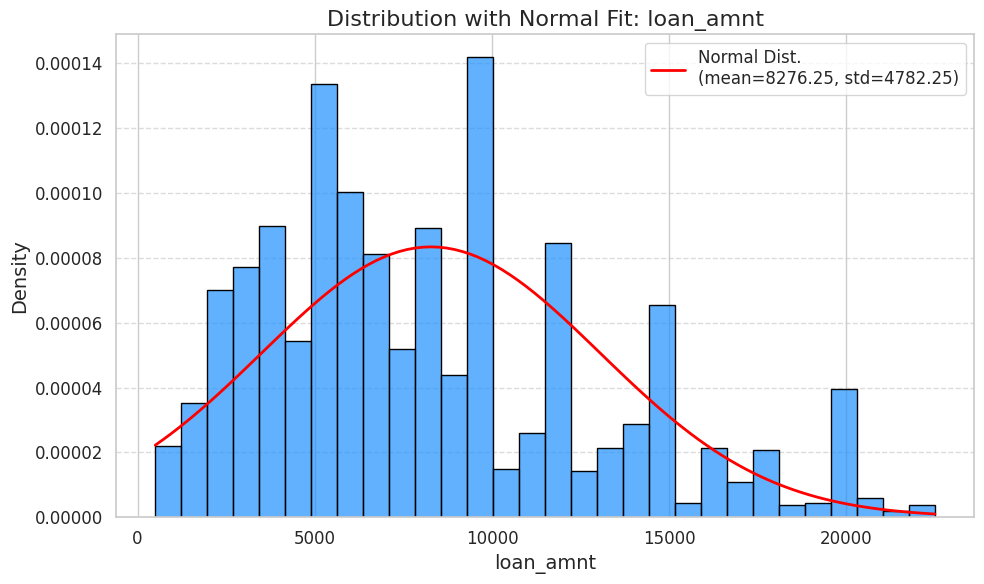

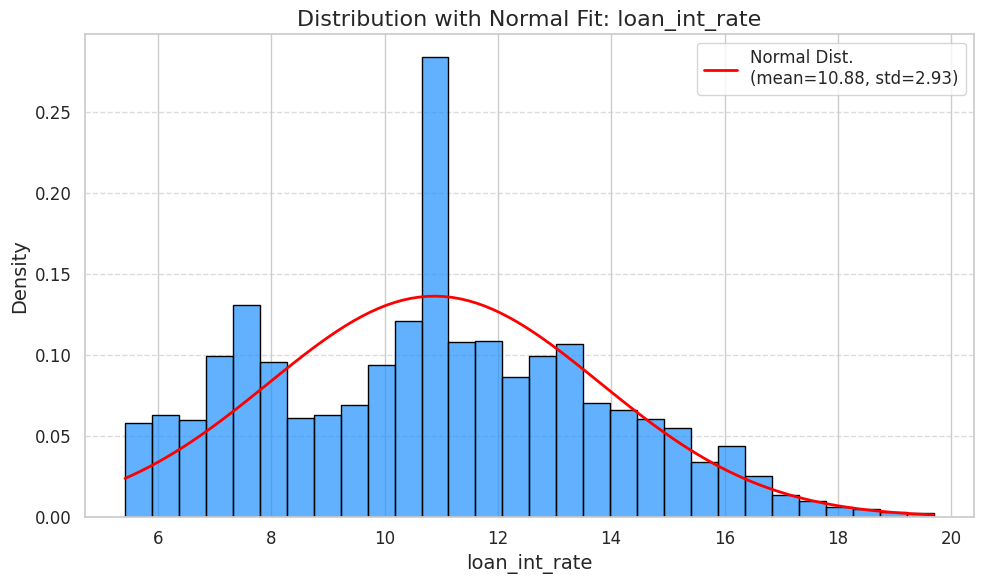

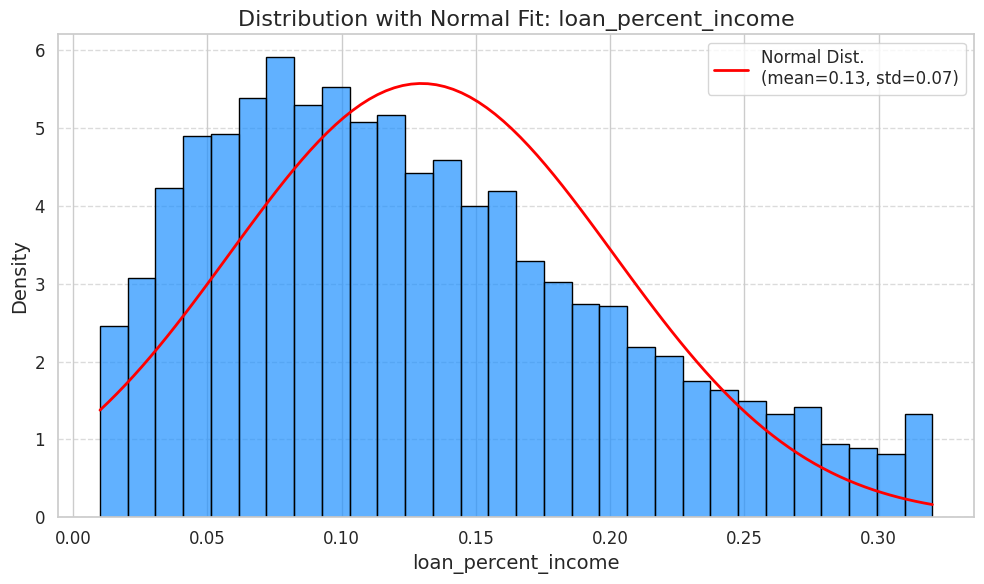

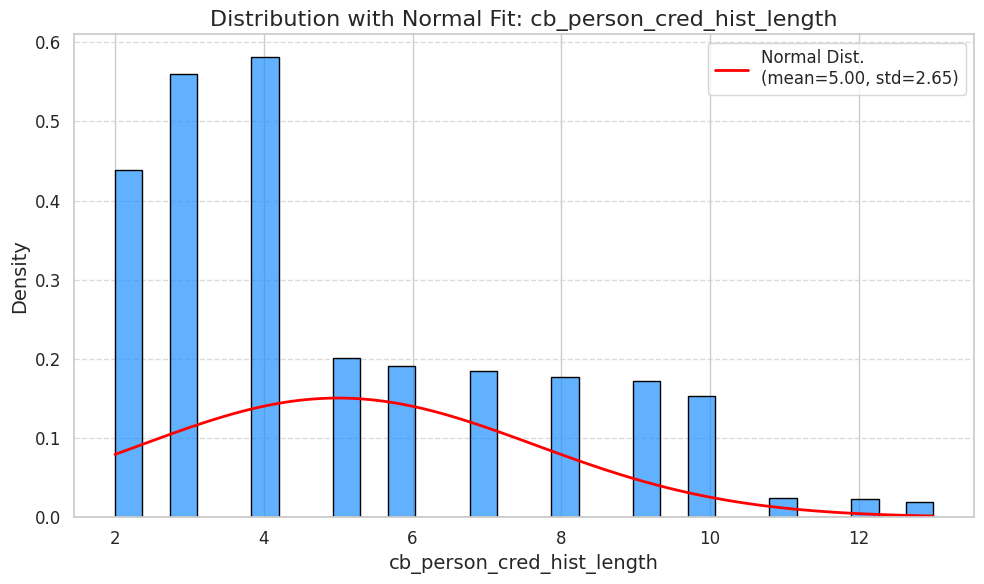

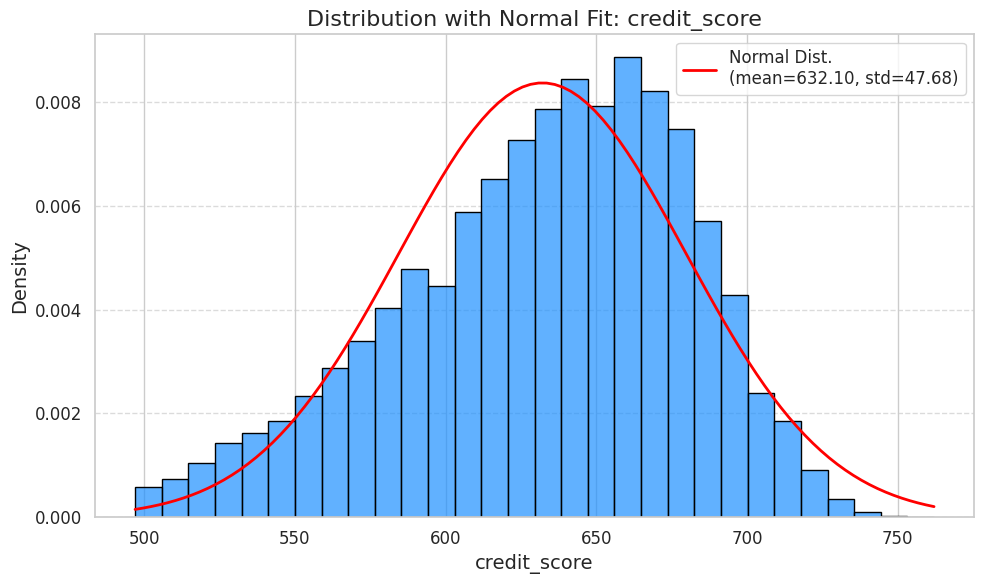

In [24]:

for col in numerical_columns:
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plot the histogram of the column
    sns.histplot(data=df, x=col, kde=False, color="dodgerblue", bins=30, edgecolor="black", alpha=0.7, stat='density')

    # Fit a normal distribution to the data
    mean, std = df[col].mean(), df[col].std()  # Calculate mean and standard deviation
    x = np.linspace(df[col].min(), df[col].max(), 100)  # Generate x-values for the normal curve
    y = norm.pdf(x, mean, std)  # Generate the normal PDF values

    # Plot the normal distribution curve
    plt.plot(x, y, color="red", linewidth=2, label=f"Normal Dist.\n(mean={mean:.2f}, std={std:.2f})")

    # Add titles and labels
    plt.title(f'Distribution with Normal Fit: {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)  # Add a legend for the normal curve
    plt.tight_layout()  # Ensure everything fits well
    plt.show()


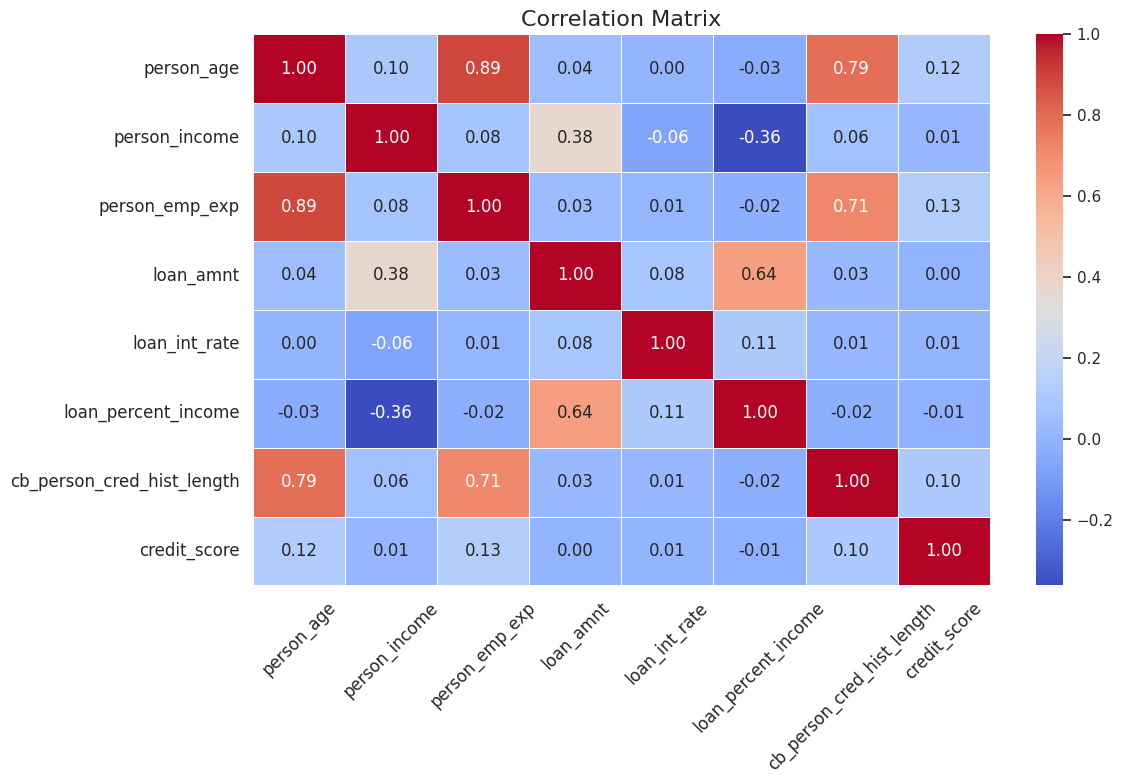

In [25]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

# Model Training 

### writing model evaluation function

    This function evaluates a model's performance by calculating precision, recall, f1-score, accuracy,
    and also plots the confusion matrix.

    Parameters:
    - y_true: True labels (actual values)
    - y_pred: Predicted labels
    - plot_confusion_matrix: Whether to plot the confusion matrix (default is True)

    Returns:
    - None (prints evaluation metrics and plots confusion matrix)


In [17]:
def evaluate_model(y_true, y_pred, plot_confusion_matrix=True):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    
    if plot_confusion_matrix:
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                    xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.title('Confusion Matrix')
        plt.show()


### set x,y variables

In [18]:
y = df["loan_status"]
X = df.drop("loan_status" , axis=1 , inplace=False)
y


1        0
5        1
9        1
19       1
23       0
        ..
44990    1
44993    1
44995    1
44997    1
44999    1
Name: loan_status, Length: 36065, dtype: int64

### Train test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### set up the model

In [20]:
# Define the model
nb = GaussianNB()

model = nb.fit(X_train, y_train)

Precision: 0.78
Recall: 0.38
F1-score: 0.51
Accuracy: 0.85


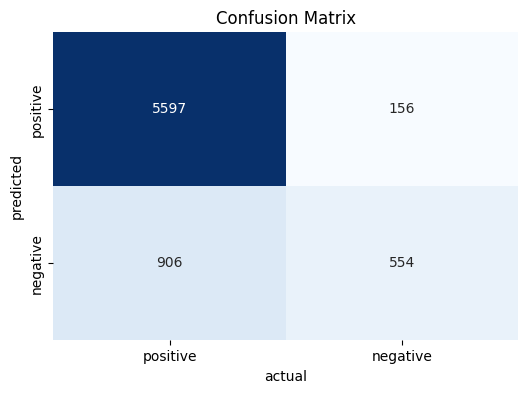

In [21]:
y_pred = nb.predict(X_test)
evaluate_model(y_test, y_pred)

## Decision Tree model 

In [22]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

non_optimized_model = dt.fit(X_train , y_train)
y_pred = non_optimized_model.predict(X_test)

Precision: 0.71
Recall: 0.73
F1-score: 0.72
Accuracy: 0.89


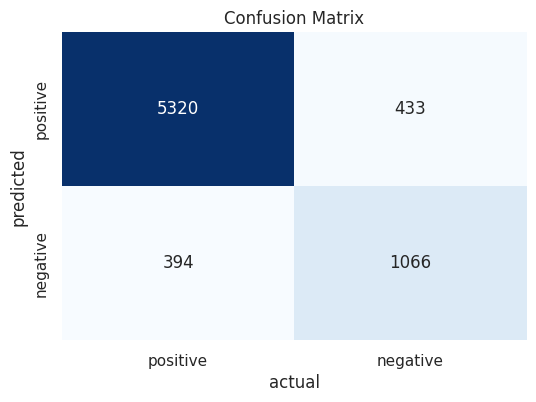

In [32]:
evaluate_model(y_test, y_pred)

In [23]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


Precision: 0.87
Recall: 0.68
F1-score: 0.76
Accuracy: 0.91


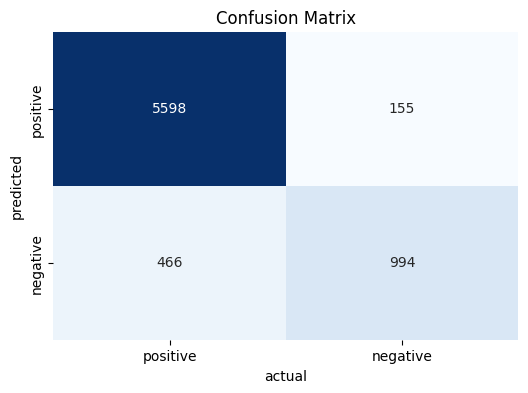

In [24]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
evaluate_model(y_test,y_pred)

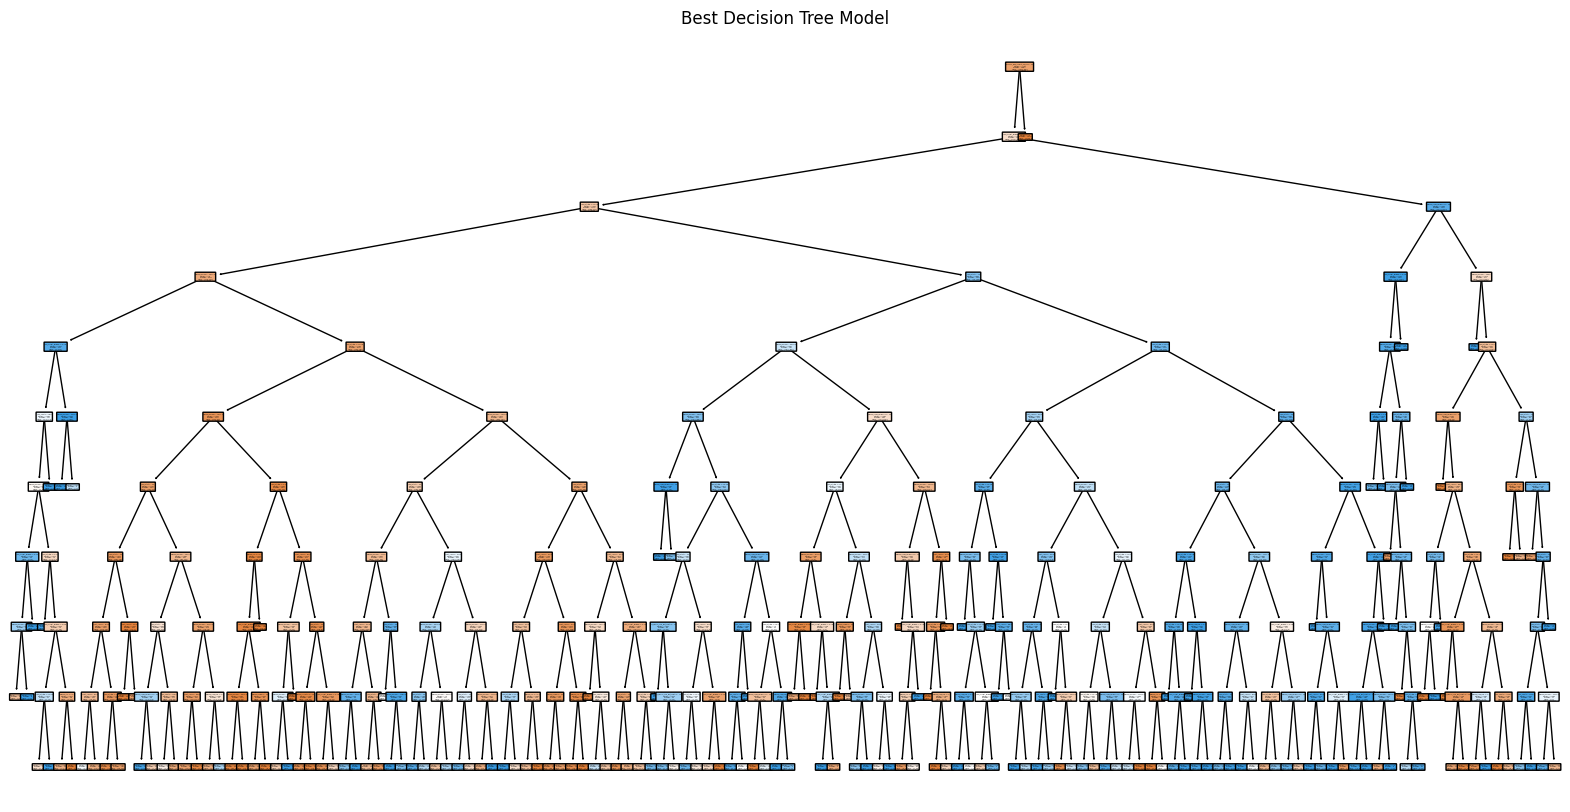

In [25]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Rejected', 'Approved'], rounded=True)
plt.title("Best Decision Tree Model")
plt.show()

### support vector machine 



Precision: 0.71
Recall: 0.38
F1-score: 0.49
Accuracy: 0.84


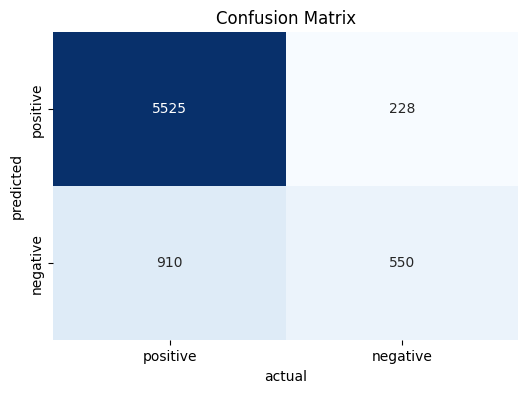

In [28]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
model_evaluate(y_test, y_pred)

/home/logiceat3r/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/logiceat3r/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Precision: 0.82
Recall: 0.34
F1-score: 0.48
Accuracy: 0.85


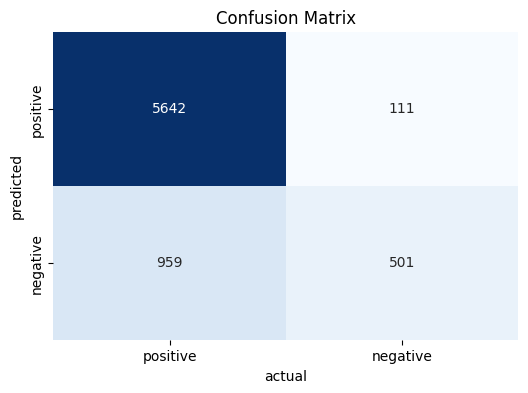

In [44]:
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],             
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] 
}

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,       
    n_jobs=-1, 
    verbose=1   
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
evaluate_model(y_test,y_pred)

## KNN

Precision: 0.64
Recall: 0.45
F1-score: 0.53
Accuracy: 0.84


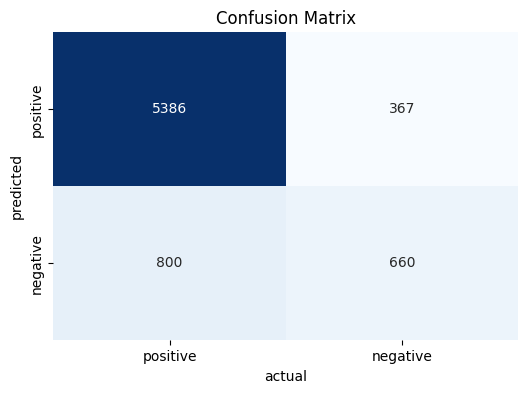

In [36]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)
    
# Make predictions
y_pred = knn.predict(X_test)
    
# Evaluate the model
evaluate_model(y_test,y_pred)

In [46]:
param_grid = {
    'n_neighbors': range(1, 10),  
    'metric': ['euclidean', 'manhattan', 'minkowski'], 
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [47]:
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

Precision: 0.73
Recall: 0.38
F1-score: 0.50
Accuracy: 0.85


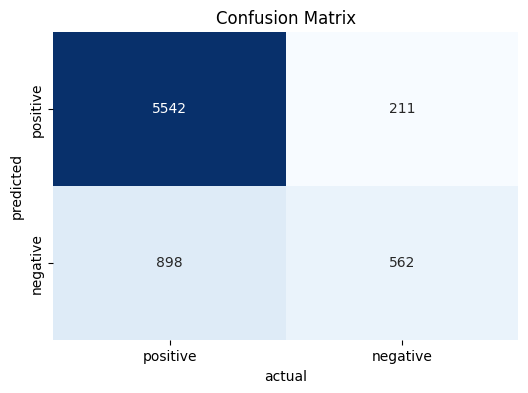

In [48]:
y_pred = best_knn.predict(X_test)
evaluate_model(y_test, y_pred)